<a href="https://colab.research.google.com/github/eduardopadilla3/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/Copy_of_LS_DS_123_Confidence_Intervals_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Confidence Intervals

The following url can be used to access an abbreviated version of responses to Stack Overflow's 2018 Developer Survey. The original Survey had ~100k respondents but the data is quite dirty so I have selected a cleaner subset of it for you to use for your assignment.

<https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv>

The provided dataset holds 14 columns of information about individuals who make less than 500k per year and who responded that they had: 

"Participated in a full-time developer training program or bootcamp"

## Part 1 - Setting the Stage

**1) Load the dataset**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
url = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv'

In [8]:
df = pd.read_csv(url)

df.head()

,Unnamed: 0,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
0,62,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data scientist or machine l...,12-14 years,6-8 years,120000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C;F#;Haskell;Python;Scala,Male,25 - 34 years old,White or of European descent
1,73,No,Employed full-time,"A humanities discipline (ex. literature, histo...",Back-end developer;Full-stack developer;System...,0-2 years,0-2 years,36000.0,Participated in a full-time developer training...,The official documentation and/or standards fo...,Four to six months,Java;JavaScript;SQL;HTML;CSS;Bash/Shell,Male,25 - 34 years old,White or of European descent
2,127,"Yes, full-time",Employed full-time,"A business discipline (ex. accounting, finance...",Full-stack developer,3-5 years,3-5 years,59980.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C#;JavaScript;TypeScript;HTML;CSS,Male,25 - 34 years old,East Asian
3,140,No,Employed full-time,"A social science (ex. anthropology, psychology...",Data scientist or machine learning specialist;...,9-11 years,3-5 years,70000.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Tapping ...,I haven’t gotten a developer job,JavaScript;Python;SQL;VBA,Male,25 - 34 years old,White or of European descent
4,153,No,Employed full-time,"Computer science, computer engineering, or sof...",Mobile developer,6-8 years,3-5 years,105000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C;Java;JavaScript;Objective-C;PHP;Python;Ruby;...,Male,25 - 34 years old,White or of European descent


**2) Select two random samples from this dataset, one with a sample size of 20 and the other with a sample size of 200. (Use a `random_state` of `42` when selecting the samples)**

In [0]:
small_sample = df.sample(20, random_state=42)
large_sample = df.sample(200, random_state=42)

In [28]:
small_sample.head()

,Unnamed: 0,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
367,11175,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data or business analyst;Da...,0-2 years,0-2 years,74500.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Online d...,I already had a full-time job as a developer w...,JavaScript;PHP;Python;SQL;HTML;CSS;Bash/Shell,Male,25 - 34 years old,"Native American, Pacific Islander, or Indigeno..."
2759,87070,No,"Not employed, but looking for work","A health science (ex. nursing, pharmacy, radio...",Mobile developer,0-2 years,0-2 years,60000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,Six months to a year,C;C#;Objective-C;Swift,Male,18 - 24 years old,Black or of African descent
1330,39067,No,Employed full-time,"Information systems, information technology, o...",Back-end developer;DevOps specialist;Front-end...,3-5 years,3-5 years,86120.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C#;Java;JavaScript;SQL;TypeScript;HTML;CSS,Male,25 - 34 years old,White or of European descent
2750,86288,No,"Not employed, but looking for work","A social science (ex. anthropology, psychology...",Front-end developer;Full-stack developer,3-5 years,3-5 years,60000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,Longer than a year,CoffeeScript;JavaScript;PHP;Python;SQL;TypeScr...,Male,25 - 34 years old,White or of European descent
521,15370,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Front-end developer;Full-st...,9-11 years,6-8 years,25047.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,Four to six months,C#;Java;JavaScript;PHP;SQL;HTML;CSS,Male,25 - 34 years old,East Asian;Middle Eastern


**3) Calculate and report the sample means of the `ConvertedSalary` column for both of the samples.**

In [31]:
sample_means_small = small_sample['ConvertedSalary'].mean()
sample_means_large = large_sample['ConvertedSalary'].mean()

print(sample_means_small)
print(sample_means_large)

55752.2
68551.255


**4) Both of these sample means are estimates of an underlying population value. Which sample mean do you trust more? Why? Would a non-technical audience have any idea about which of these values is more trustworthy?**

I trust the sample mean of the large sample more because it has more data, it will be more accurate. Chances are, a non-technical audience may not know the difference

**5) Does just the point estimate (individual value of the sample mean) indicate to you anything about how much sampling error there could be with these estimates?**

the point of estimate aloone will not tell you anything about the sampling erro unless compared to another sample or entire data.

**6) What strategies could we use when reporting these numbers to not only report our estimates but also to give non-technical readers an idea about how far off our estimates might be due to sampling error?**



Leave a note explaining how large the entire data and how a sample of x may differ significantly depending on the proportion.

## Part 2 - Reporting CIs / MOEs along with our point estimates for more context.

**1) Calculate and report a 95% confidence interval around both of the sample means from part 1.**



In [32]:
from scipy import stats

def confidence_interval(data, confidence=.95):
  # Make sure we're working with a numpy array
  sample = np.array(data)
  # Sample Mean
  x_bar = sample.mean()
  # Sample Standard Deviation
  s = np.std(sample, ddof=1)
  # Sample Size
  n = len(sample)
  # T statistic - correspond to our confidence level, and our degrees of freedom
  t = stats.t.ppf((1+confidence) / 2, n-1)
  # Standard Error
  std_err = s / np.sqrt(n)
  # Margin of Error
  moe = std_err * t
  # Lower and Upper Bound
  upper = x_bar + moe
  lower = x_bar - moe

  return (lower, x_bar, upper)

confidence_interval(small_sample['ConvertedSalary'])


(35805.10309625536, 55752.2, 75699.29690374463)

In [33]:
# Confidence Interval with sample size of 20
CIS = confidence_interval(small_sample['ConvertedSalary'])
CIS

(35805.10309625536, 55752.2, 75699.29690374463)

In [34]:
# Confidence Interval with sample size of 200
CIL = confidence_interval(large_sample['ConvertedSalary'])
CIL

(60593.058804479086, 68551.255, 76509.45119552092)

**2) Which confidence interval is wider and why?**

The confidence interval of the first sample is much wider. Due to its lower sample size the standard error of our estimate is much larger causing the potential distribution of sample means to be much more spread out. A confidence interval catches 95% of this theoretical distriution of sample means so if our standard error is larger, our confidence interval will be wider as well.

**3) Report the mean and the margin of error for both of the sample means. What does the Margin of Error Represent?**

In [37]:
print("Estimated Converted Salary (20)")
print("Mean:", CIS[1])
print("MOE:", CIS[2]-CIS[1])

Estimated Converted Salary (20)
Mean: 55752.2
MOE: 19947.096903744634


In [38]:
print("Estimated Converted Salary (200)")
print("Mean:", CIL[1])
print("MOE:", CIL[2]-CIL[1])

Estimated Converted Salary (200)
Mean: 68551.255
MOE: 7958.196195520912


The margin of error gives an idea of how far off our estimates might be (with 95% confidence). We're trying to supply a plausible range for our parameter of interest (the true average salary of bootcamp grads).

## Part 3 - Communicate the Precision of Sample Estimates Graphically

**1) Create a plot using `plt.errorbar` that compares both of the confidence intervals.** 

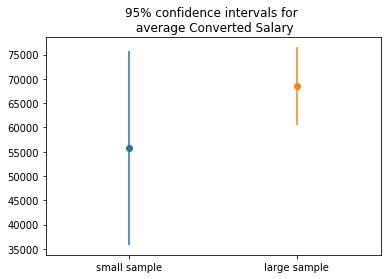

In [39]:
# plt.errorbar
plt.errorbar(x=0, y=CIS[1], yerr=(CIS[2]-CIS[1]), fmt='o')
plt.errorbar(x=1, y=CIL[1], yerr=(CIL[2]-CIL[1]), fmt='o')
plt.title('95% confidence intervals for \n average Converted Salary')
plt.xticks(ticks=[0,1], labels=['small sample', 'large sample'])
plt.xlim(-.5, 1.5)
plt.show()

**2) Create a plot using `plt.bar` that compares both of the confidence intervals.**

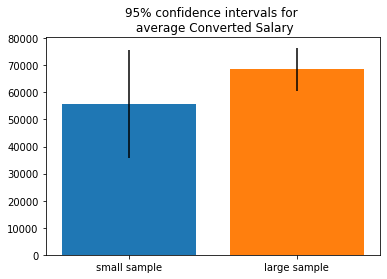

In [40]:
# plt.errorbar
plt.bar(x=0, height=CIS[1], yerr=(CIS[2]-CIS[1]))
plt.bar(x=1, height=CIL[1], yerr=(CIL[2]-CIL[1]))
plt.title('95% confidence intervals for \n average Converted Salary')
plt.xticks(ticks=[0,1], labels=['small sample', 'large sample'])
plt.xlim(-.5, 1.5)
plt.show()

## Part 4 - Check for Understanding







**Calculate a Confidence Interval using the entire dataset. How precise do our estimates get?**

In [41]:
# Confidence Interval for entire dataset
CI = confidence_interval(df['ConvertedSalary'])
CI

(71299.82986224785, 73453.40420137631, 75606.97854050477)

In [42]:
print("Estimated Converted Salary (entire dataset)")
print("Mean:", CI[1])
print("MOE:", CI[2]-CI[1])

Estimated Converted Salary (entire dataset)
Mean: 73453.40420137631
MOE: 2153.574339128463


In [43]:
df.shape

(2761, 15)

**What does "precision" mean in the context of statistical estimates and how is that different from "accuracy?"**

accuracy refers to how close something is to a known value and precision refers to how close a value is to other values.

**It is very common to misunderstand what is captured by a 95% confidence interval. What is the correct interpretation? ([Hint](https://www.statisticssolutions.com/misconceptions-about-confidence-intervals/))**

A 95% level of confidence means that 95% of the confidence intervals calculated from these random samples will contain the true population mean

# Stretch Goals:

1) Study the relationship between t-tests and confidence intervals.
 - Find a sample mean that we have worked with and construct a 95% confidence interval around it. (find the lower and upper bounds)
 - Run a 1-sample t-test with the null hypothesis value being just barely **outside** of the confidence interval. What is the p-value?
 - Run a 1-sample t-test with the null hypothesis value being just barely **inside** of the confidence interval. What is the p-value?

  What does it mean when we say that the boundaries of the confidence interval are the boundaries of statistical significance in a 1-sample t-test?


2) Go back to our [congressional voting dataset](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) and build confidence intervals around the means of all of the issues for a single party. Compare all of those confidence intervals graphically on a single graph. 

3) Dive deeper into the [2018 Stack Overflow Survey](https://www.kaggle.com/stackoverflow/stack-overflow-2018-developer-survey) results to see what cool things you can find.